In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [16]:
print(os.getcwd())

C:\Users\nitish gehlot


In [35]:
df=pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.shape

(7043, 21)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")


In [28]:
df.isnull().sum().sum()

np.int64(0)

In [30]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [33]:
df["customerID"].duplicated().sum()

np.int64(0)

In [36]:
def conv(value):
    if value==1:
        return "Yes"
    else:
        return "No"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

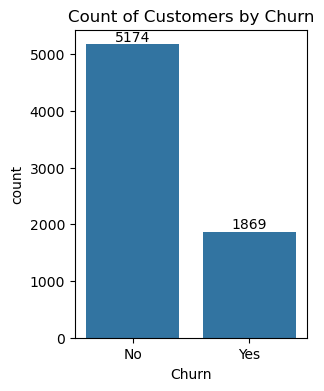

In [52]:
plt.figure(figsize=(3,4))
z= sns.countplot(x='Churn', data=df)
z.bar_label(z.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

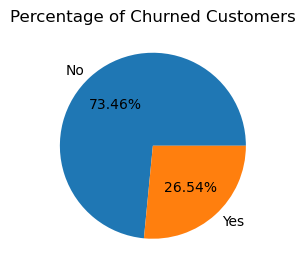

In [51]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()

#From the pie chart we can conclude that 26.54% of our customers have churned out

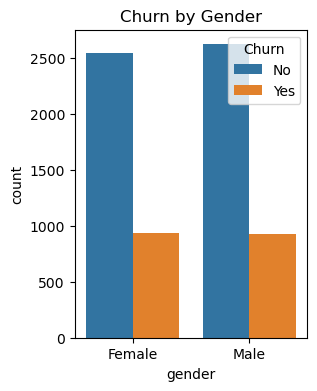

In [54]:
plt.figure(figsize=(3,4))
sns.countplot(x="gender", data=df, hue="Churn")
plt.title("Churn by Gender")
plt.show()

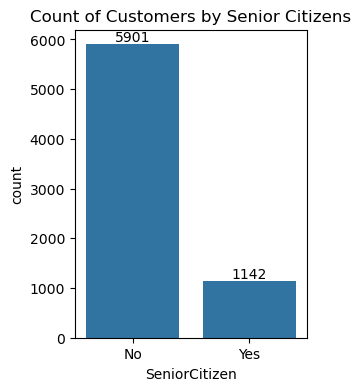

In [63]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x="SeniorCitizen", data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizens")
plt.show()

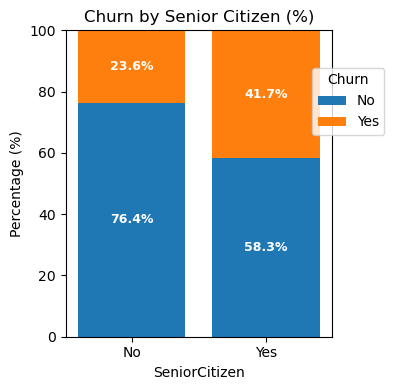

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Sanity checks ---
required_cols = {"SeniorCitizen", "Churn"}
if not required_cols.issubset(df.columns):
    raise ValueError(f"DataFrame must contain columns: {required_cols}. Found: {list(df.columns)}")

# --- Prepare counts and percentages ---
# Use crosstab so shape is stable even when a category is missing
counts = pd.crosstab(df["SeniorCitizen"], df["Churn"])
counts = counts.sort_index()            # order by SeniorCitizen (0,1)
counts = counts.fillna(0)               # guard against NaN

# Convert to percent of each SeniorCitizen group (row-wise)
percents = counts.div(counts.sum(axis=1), axis=0).multiply(100).round(2)

# --- Plot stacked bar chart (percent) ---
fig, ax = plt.subplots(figsize=(4,4))
bottom = np.zeros(len(percents))

categories = percents.columns.tolist()  # churn labels, e.g., ['No','Yes'] or [0,1]

# Colors: matplotlib will choose default colors (do not set custom unless needed)
for cat in categories:
    values = percents[cat].values
    ax.bar(percents.index.astype(str), values, bottom=bottom, label=str(cat))
    # add labels in the middle of each stacked segment
    for i, v in enumerate(values):
        if v > 0.5:  # only label segments reasonably large (avoid clutter)
            y = bottom[i] + v / 2
            ax.text(i, y, f"{v:.1f}%", ha='center', va='center', fontsize=9, fontweight='bold', color='white')
    bottom += values

# --- Formatting ---
ax.set_title("Churn by Senior Citizen (%)")
ax.set_xlabel("SeniorCitizen")
ax.set_ylabel("Percentage (%)")
ax.legend(title="Churn", bbox_to_anchor = (0.9,0.9))
ax.set_ylim(0, 100)
plt.tight_layout()
plt.show()


# A greater percentage of people in senior citizen category have churned.

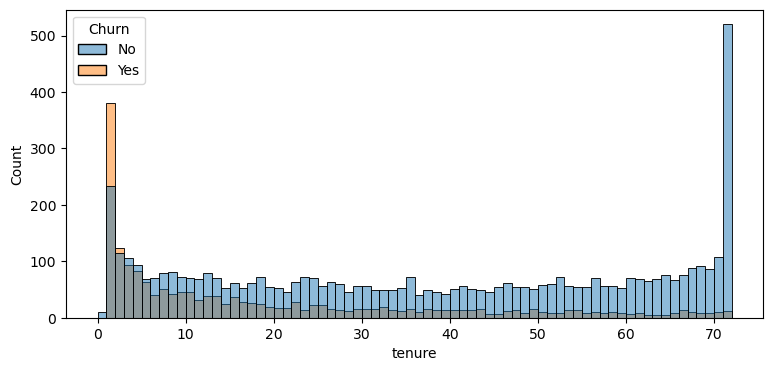

In [70]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure", data = df, bins=72, hue="Churn")
plt.show()

#People who have used our services for long time have stayed and people who have used our services for 1-2 months have churned.

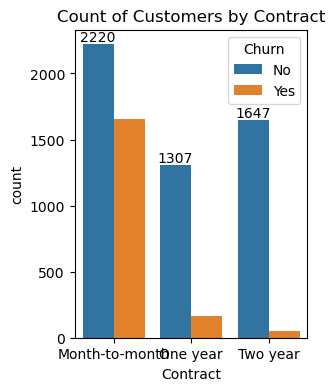

In [71]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x="Contract", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

#People who have month to month contract have likely to churn then from those who have 1-2 years of contract.

In [72]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

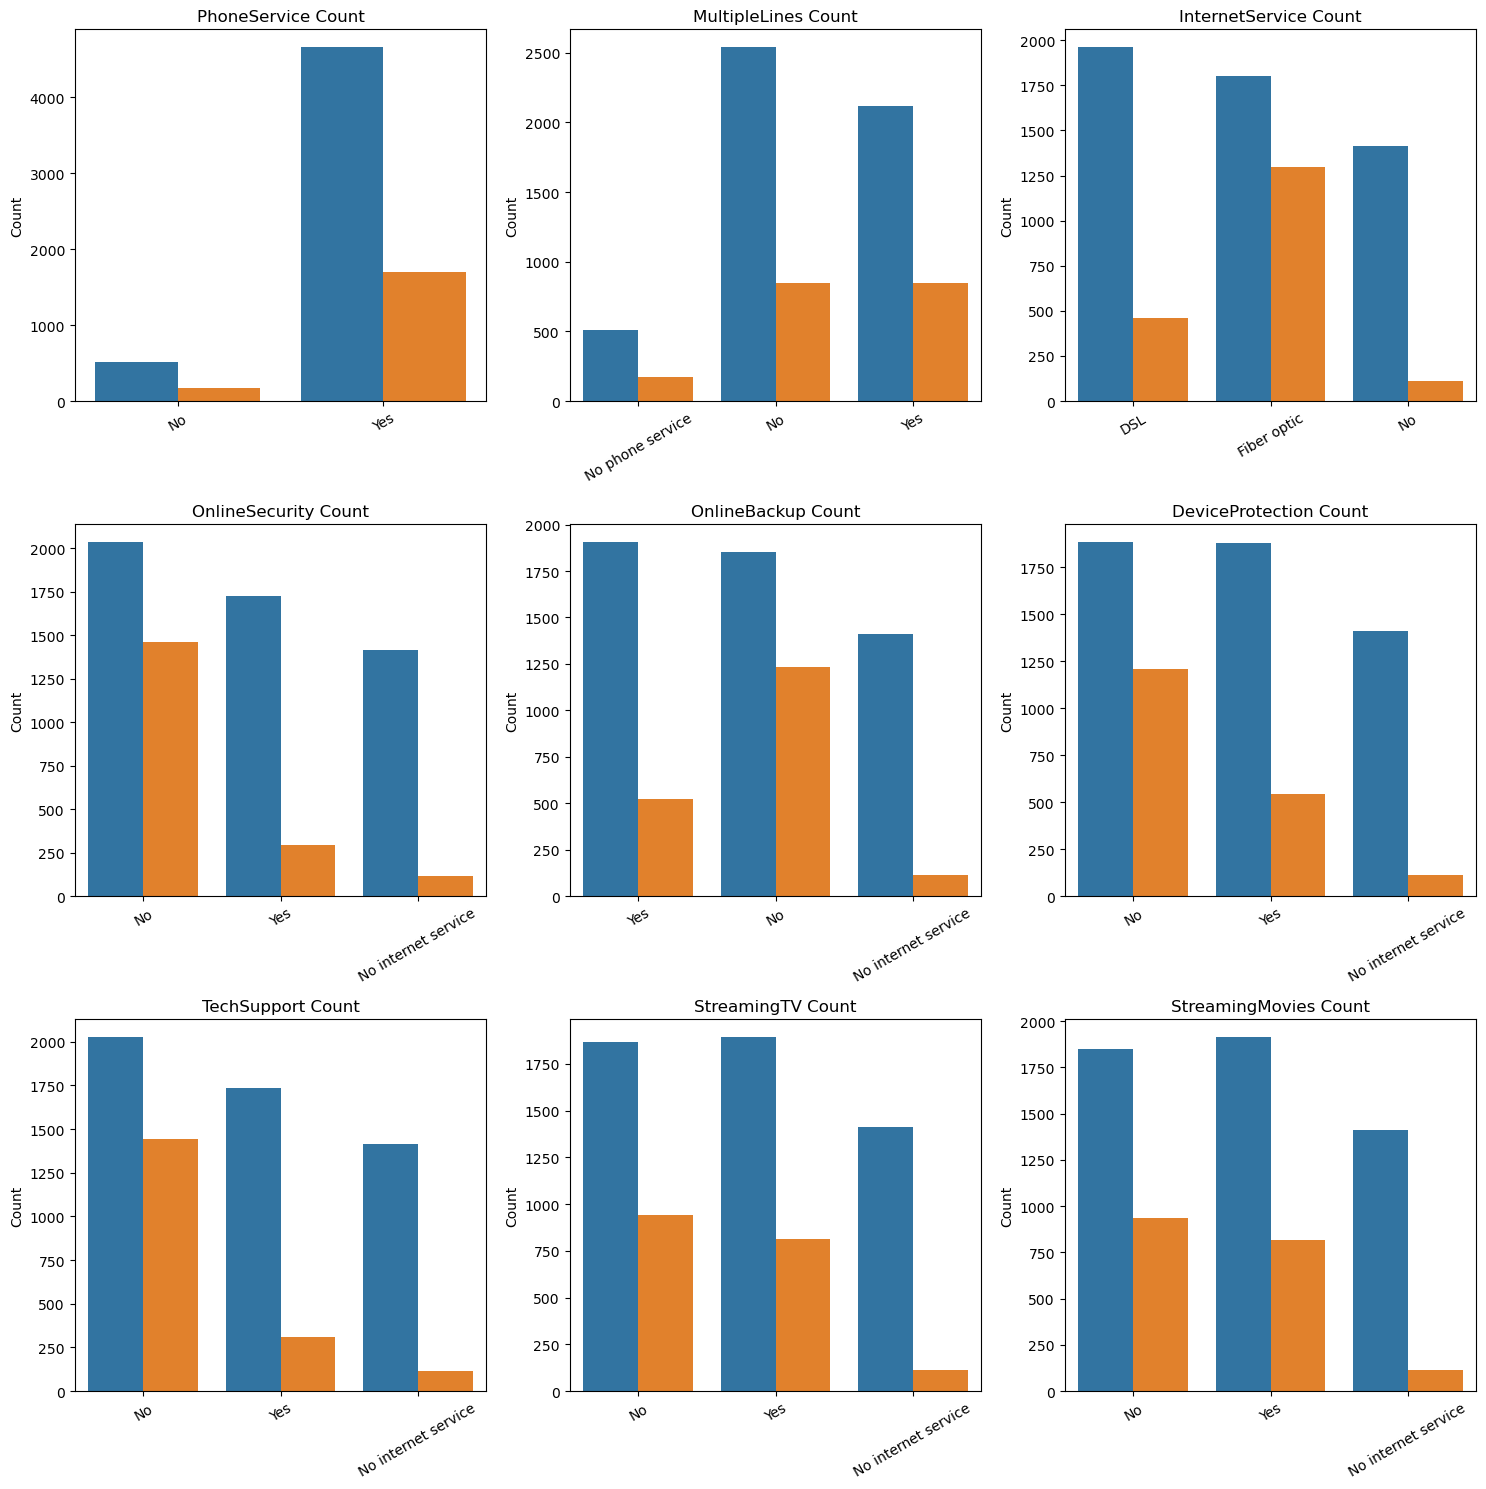

In [80]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Filter only columns that exist in your DataFrame
cols = [c for c in cols if c in df.columns]

# Create subplots dynamically
n = len(cols)
rows = (n + 2) // 3  # 3 plots per row
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, hue=df["Churn"], legend=False, ax=axes[i])
    axes[i].set_title(f'{col} Count', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=30)

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#Customers with limited or no add-on services—such as Online Security, Tech Support, or Device Protection—show a higher likelihood of churn, while those subscribed to multiple bundled services tend to remain more loyal and have lower churn rates.

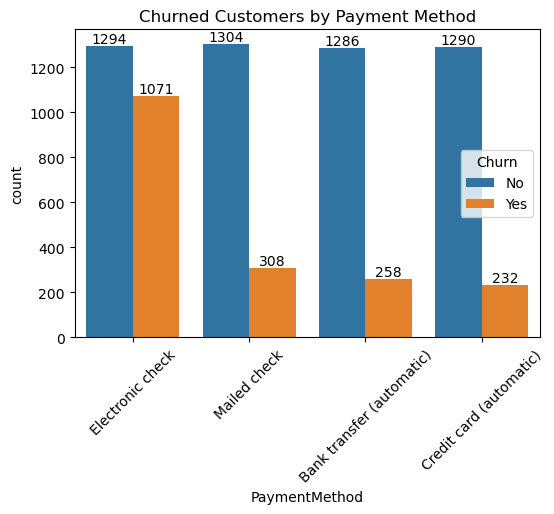

In [84]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation=45)
plt.show()

#Customer is likely to churn when he is using electric check as a payment method.